In [2]:
import pandas as pd
import numpy as np
import os
import logging

In [3]:
logger = logging.getLogger(__name__)
logger_format = '[%(asctime)s] [%(process)d] [%(levelname)s] %(message)s'
logging.basicConfig(format=logger_format,
                    datefmt='%Y-%m-%d %H:%M:%S %z',
                    level=logging.INFO)

In [15]:
data_path = "/home/jiraki/Workspaces/merchant_segment/data/kcc_2018_by_cat"
filelist = os.listdir(data_path)

In [18]:
filename = 'kcc_2018_DINN.csv'

In [ ]:
for f in filelist:
    subset_df = pd.read_csv(os.path.join(data_path,f), encoding="utf-8")
    nrow = len(subset_df)
    nrow_other = len(subset_df[subset_df.MERCHANT_BASE=='OTHER'])
    print(f, nrow,',', nrow_other,',', nrow_other/nrow)

In [ ]:
for f in filelist:
    subset_df = pd.read_csv(os.path.join(data_path,f), encoding="utf-8")
    n_org_code = len(set(subset_df.ORG_MERCHANT_CODE.values))
    n_base = len(set(subset_df.MERCHANT_BASE.values))
    subset_df = subset_df[subset_df.MERCHANT_BASE=='OTHER']
    n_org_code_in_other = len(set(subset_df.ORG_MERCHANT_CODE.values))
    print(n_org_code,',', n_base,',', n_org_code_in_other)

In [141]:
subset_df = pd.read_csv(os.path.join(data_path,filename), encoding="utf-8")
nrow = len(subset_df)
nrow_other = len(subset_df[subset_df.MERCHANT_BASE=='OTHER'])
print(nrow,',', nrow_other,',', nrow_other/nrow)

4933966 , 2534290 , 0.5136415613727374


In [22]:
cat = filename

In [20]:
subset_df.head(10)

TXN_DATE_KEY  CATEGORY_CODE  TXN_AMOUNT  \
0     9/5/2018           5812     3032.00   
1    25/2/2018           5812      415.00   
2     6/1/2018           5812     1133.00   
3    23/1/2018           5813     1165.00   
4    21/1/2018           5812     1008.00   
5    18/2/2018           5812     2556.87   
6    22/2/2018           5812     2375.00   
7    13/3/2018           5812     1743.00   
8    16/3/2018           5812     1367.00   
9     8/5/2018           5812    14150.00   

                       MERCHANT_DESCRIPTION  MERCHANT_KEY ORG_MERCHANT_CODE  \
0  BANGRAK SOI 14         NAKHONRATSIMA THA       2836135      051005117200   
1   FUJI 3                 BANGKOK       TH         47809      002200313252   
2   FUJI (TERMINAL21)      BANGKOK       TH       2442359      002201464880   
3     FIRE AND DINE            BANGKBANGKOK       2830453         950355057   
4   LAEMCHAROEN SEAFOOD    BANGKOK       TH        821173         011109645   
5   MAGURO GROUP-BANGNA    BANGKOK       TH       8473163      001010437259   
6   DEUTSCHES ECK          BANGKOK       TH       4248895   000001982000324   
7   FUJI (F09 M.B.K.)      BANGKOK       TH       1279691      002200546224   
8   LAEMCHAROEN SEAFOOD    BANGKOK       TH        821173         011109645   
9   SIAMHONGKONG CHINESE F BANGKOK       TH       1444969      001110239068   

  ONLINEFLAG INTERFLAG MERCHANT_CAT MERCHANT_BASE  DAY  MONTH  YEAR  \
0          N         N         DINN         OTHER    9      5  2018   
1          N         N         DINN          FUJI   25      2  2018   
2          N         N         DINN          FUJI    6      1  2018   
3          N         N         DINN         OTHER   23      1  2018   
4          N         N         DINN   LAEMCHAROEN   21      1  2018   
5          N         N         DINN         OTHER   18      2  2018   
6          N         N         DINN         OTHER   22      2  2018   
7          N         N         DINN          FUJI   13      3  2018   
8          N         N         DINN   LAEMCHAROEN   16      3  2018   
9          N         N         DINN         OTHER    8      5  2018   

  DAY_OF_WEEK  quarter  
0   Wednesday        2  
1      Sunday        1  
2    Saturday        1  
3     Tuesday        1  
4      Sunday        1  
5      Sunday        1  
6    Thursday        1  
7     Tuesday        1  
8      Friday        1  
9     Tuesday        2

In [142]:
# Trim head-tail 5% in each cat
p025 = np.percentile(subset_df.TXN_AMOUNT, 2.5)
p975 = np.percentile(subset_df.TXN_AMOUNT, 97.5)
logging.INFO("CAT: %s => (p025: %.3f, p975: %.3f)" % (cat, p025, p975))
ind = (subset_df.TXN_AMOUNT >= p025) & (subset_df.TXN_AMOUNT <= p975)
subset_df = subset_df[ind]
logging.INFO("CAT: %s => shape after trim: %s" % (cat, str(subset_df.shape)))

TypeError: 'int' object is not callable

In [143]:
subset_df.shape

(4933966, 15)

In [144]:
subset_df = subset_df[subset_df.MERCHANT_BASE!='OTHER']
subset_df.shape

(2399676, 15)

In [27]:
from dfply import *
tmp = (subset_df >>
      group_by(X.ORG_MERCHANT_CODE) >>
      summarize(c = n_distinct(X.MERCHANT_DESCRIPTION))
      )

In [145]:
subset_df[subset_df.ORG_MERCHANT_CODE=='000000000000000'].head(5)

TXN_DATE_KEY  CATEGORY_CODE  TXN_AMOUNT  \
10498     23/3/2018           5814     1251.18   
10771     15/3/2018           5814     1173.14   
27605     17/4/2018           5814     1375.92   
37425     26/4/2018           5814      345.74   
104895    31/1/2018           5814     1085.51   

                           MERCHANT_DESCRIPTION  MERCHANT_KEY  \
10498   OOTOYA AKASAKAMITSUKE  TOKYO         JP       7630117   
10771   OOTOYA                 SAGAMIHARA    JP       8752906   
27605   OOTOYA                 OSAKA         JP       5825099   
37425   OOTOYA                 KYOTO         JP       6614891   
104895  OOTOYA                 TOKYO         JP       4491929   

       ORG_MERCHANT_CODE ONLINEFLAG INTERFLAG MERCHANT_CAT MERCHANT_BASE  DAY  \
10498    000000000000000          N         Y         DINN    CRG_OOTOYA   23   
10771    000000000000000          N         Y         DINN    CRG_OOTOYA   15   
27605    000000000000000          N         Y         DINN    CRG_OOTOYA   17   
37425    000000000000000          N         Y         DINN    CRG_OOTOYA   26   
104895   000000000000000          N         Y         DINN    CRG_OOTOYA   31   

        MONTH  YEAR DAY_OF_WEEK  quarter  
10498       3  2018      Friday        1  
10771       3  2018    Thursday        1  
27605       4  2018     Tuesday        2  
37425       4  2018    Thursday        2  
104895      1  2018   Wednesday        1

In [39]:
subset_df = subset_df[subset_df.ORG_MERCHANT_CODE!='999999998']
subset_df = subset_df[subset_df.ORG_MERCHANT_CODE!='000000000000000']
subset_df.shape

(2140602, 15)

In [30]:
tmp.sort_values(by=['c'], ascending=False)

ORG_MERCHANT_CODE     c
8041         999999998  3803
3      000000000000000    14
2935      002201483526     5
5209         011873258     4
5357         012028365     4
5224         011889411     4
3950      002205568983     4
943       001001094832     4
2229      002201097649     4
732       001000073605     4
5214         011880154     4
3607      002201788965     4
5199         011801514     4
5353         012028323     4
5193         011667867     4
5362         012030633     4
928       001001052490     4
924       001001021083     4
915       001000990124     4
1859      001110412921     4
910       001000974966     4
1651      001010253231     4
891       001000935247     4
5354         012028331     4
4098      002205863905     4
882       001000898160     4
2791      002201479805     4
5310         011986324     4
1009      001001227231     4
5327         011998957     4
...                ...   ...
4958         011432773     1
4786         010373051     1
4784   010311076000001     1
4783   010310732000001     1
4752   010000950778464     1
4738   010000950647818     1
4739   010000950647826     1
4740   010000950664201     1
4741   010000950667980     1
4742   010000950668921     1
4746   010000950684423     1
4747   010000950694489     1
4748   010000950724856     1
4749   010000950725150     1
4750   010000950753210     1
4751   010000950769364     1
4753   010000951700769     1
4779      010244864  0     1
4754   010000951700772     1
4755   010000951701099     1
4756   010000951714342     1
4757   010000951718115     1
4758   010000951720370     1
4759   010000951721025     1
4760   010000951722076     1
4761   010000951725609     1
4762   010000951729607     1
4763   010000951734306     1
4772   010100091040097     1
8085            Y22172     1

[8086 rows x 2 columns]

In [41]:
from dfply import *
mkey_month_df = (subset_df >>
                group_by(X.ORG_MERCHANT_CODE, X.MONTH) >>
                summarize(freq = n(X.TXN_AMOUNT),
                         sum_amount = X.TXN_AMOUNT.sum(),
                         avg_amount = mean(X.TXN_AMOUNT),
                         max_amount = colmax(X.TXN_AMOUNT),
                         min_amount = colmin(X.TXN_AMOUNT))
                )

mkey_week_df = (subset_df >>
                group_by(X.ORG_MERCHANT_CODE, X.DAY_OF_WEEK) >>
                summarize(freq = n(X.TXN_AMOUNT),
                         sum_amount = X.TXN_AMOUNT.sum(),
                         avg_amount = mean(X.TXN_AMOUNT),
                         max_amount = colmax(X.TXN_AMOUNT),
                         min_amount = colmin(X.TXN_AMOUNT))
                )

mkey_day_df = (subset_df >>
                group_by(X.ORG_MERCHANT_CODE, X.DAY) >>
                summarize(freq = n(X.TXN_AMOUNT),
                         sum_amount = X.TXN_AMOUNT.sum(),
                         avg_amount = mean(X.TXN_AMOUNT),
                         max_amount = colmax(X.TXN_AMOUNT),
                         min_amount = colmin(X.TXN_AMOUNT))
                )

In [59]:
tmp = mkey_month_df.pivot(index="ORG_MERCHANT_CODE", columns="MONTH", values="avg_amount")
tmp = tmp.reindex(sorted(tmp.columns, key=lambda x: int(x)), axis=1)
tmp.shape

(8084, 12)

In [61]:
tmp.dropna(inplace=True)

In [48]:
tmp.fillna(0, inplace=True)

In [62]:
tmp.head(5)

MONTH                      1           2           3           4           5   \
ORG_MERCHANT_CODE                                                               
000001008012071    736.286885  709.923913  588.701923  625.204819  645.797872   
000001163017571    671.384615  709.000000  893.550000  644.854839  784.487805   
000001163017572    741.362416  634.224490  654.723810  668.430769  619.031746   
000001163017573    511.625000  424.529412  483.130435  520.692308  691.407407   
000001163017574    837.268293  669.200000  717.575758  659.216216  679.470588   

MONTH                      6           7           8           9           10  \
ORG_MERCHANT_CODE                                                               
000001008012071    634.989691  573.486957  579.113402  667.517647  626.836735   
000001163017571    696.444444  748.891304  651.500000  668.983607  731.507937   
000001163017572    629.880597  641.108108  621.712121  565.607143  646.920635   
000001163017573    582.484848  662.032258  502.750000  621.652174  611.000000   
000001163017574    728.392857  577.241379  648.636364  643.709677  601.342857   

MONTH                      11          12  
ORG_MERCHANT_CODE                          
000001008012071    650.000000  633.861386  
000001163017571    679.294118  738.604167  
000001163017572    626.653846  812.698413  
000001163017573    581.000000  522.166667  
000001163017574    589.115385  711.425000

In [63]:
tmp[9].values.tolist()

[667.5176470588235,
 668.983606557377,
 565.6071428571429,
 621.6521739130435,
 643.7096774193549,
 706.0,
 524.4722222222222,
 523.1176470588235,
 682.1521739130435,
 516.0652173913044,
 596.6595744680851,
 638.1914893617021,
 523.9714285714285,
 519.5,
 1073.5,
 614.4545454545455,
 579.7575757575758,
 797.0727272727273,
 1117.0,
 1126.22125,
 847.1123333333333,
 860.0289795918367,
 1375.4437931034483,
 2013.9880952380952,
 330.0,
 401.5,
 1586.5,
 1429.9583333333333,
 1161.5,
 3678.375,
 1013.28125,
 950.0,
 560.72,
 1379.142857142857,
 1066.1538461538462,
 1956.4444444444443,
 526.0,
 1164.0714285714287,
 1220.8085106382978,
 1008.6666666666666,
 306.014,
 2328.5983333333334,
 2684.5805000000005,
 1608.3166666666666,
 2884.6977777777774,
 1380.5555555555557,
 538.5,
 2087.91,
 1086.8,
 3297.9166666666665,
 968.375,
 813.6268656716418,
 1833.8695652173913,
 2786.6666666666665,
 1892.2222222222222,
 1094.1785714285713,
 954.7826086956521,
 2014.8039215686274,
 911.6451612903226,
 758.

(array([ 16.,  53., 109., 137., 152., 193., 165., 188., 165., 167., 189.,
        268., 308., 251., 231., 134., 113.,  82.,  74.,  40.,  25.,  21.,
         28.,  17.,  12.,  14.,  16.,   6.,   2.,   9.,   2.,  10.,   8.,
          8.,   1.,   2.,   2.,   1.,   2.,   3.,   0.,   2.,   2.,   3.,
          1.,   1.,   4.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          0.,   1.,   1.]),
 array([ 162.47      ,  219.19748792,  275.92497585,  332.65246377,
         389.37995169,  446.10743961,  502.83492754,  559.56241546,
         616.28990338,  673.0173913 ,  729.74487923,  786.47236715,
         843.19985507,  899.927343  ,  956.65483092, 1013.38231884,
        1070.10980676, 1126.83729469, 1183.56478261, 1240.29227053,
        1297.01975845, 1353.74724638, 1410.4747343 , 1467.20222222,
        1523.92971014, 1580.65719807, 1637.38468599, 1694.11217391,
        1750.83966184, 1807.56714976, 1864.29463768,

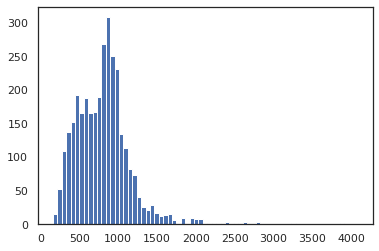

In [64]:
a = tmp[9].values.tolist()
plt.hist(a, bins='auto')

In [43]:
a = (mkey_month_df >>
group_by("ORG_MERCHANT_CODE") >>
summarize(avg_freq = (X.freq.sum())))

In [53]:
b = a.avg_freq.values.tolist()

In [70]:
sum(b)/len(b)

186.2006968641115

In [74]:
ind = [x>10 for x in b]
sum(ind)

835

In [78]:
tmp2 = tmp[ind]

In [80]:
tmp2.fillna(0, inplace=True)

/home/jiraki/anaconda3/envs/test/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [81]:
tmp2

MONTH                  1       2       3       4       5       6       7   \
ORG_MERCHANT_CODE                                                           
000000000596752     238.0   224.0   302.0   244.0   266.0   181.0   232.0   
000000000604315    1122.0  1155.0  1042.0   867.0   751.0   689.0   721.0   
000000000664202    2849.0  2404.0  2729.0  2506.0  2462.0  2009.0    56.0   
000000000688591     865.0   837.0  1221.0  1072.0  1198.0   977.0   868.0   
000000000688616       6.0     4.0    10.0    11.0    11.0     2.0     7.0   
000000000688640       3.0     1.0     1.0     4.0     3.0     5.0     5.0   
000000000688658      14.0    12.0    10.0     9.0     9.0     8.0    13.0   
000000000688947       0.0     1.0     3.0     1.0     4.0     4.0     0.0   
000000000689979    1685.0  1431.0  1551.0   795.0   709.0   567.0   602.0   
000000000689995     593.0   406.0   494.0   369.0   425.0   315.0   267.0   
000000000691883       2.0     1.0     3.0     1.0     4.0     3.0     7.0   
000000000691924       0.0     1.0     2.0     1.0     0.0     3.0     0.0   
000000000694978      11.0    13.0     5.0     5.0     5.0     7.0    10.0   
000000000697138      21.0     8.0    17.0     9.0     5.0     8.0     9.0   
000000000697500       0.0     2.0     6.0     2.0     1.0     0.0     3.0   
000000000704545       5.0     9.0     8.0    18.0     6.0    11.0    15.0   
000000000704553       2.0     3.0     2.0     1.0     4.0     6.0     4.0   
000000000704561       8.0     2.0     7.0     8.0     6.0     5.0     3.0   
000000000704595       1.0     2.0     0.0     3.0     4.0     4.0     7.0   
000000000729387     311.0   268.0   291.0   222.0   234.0   262.0   275.0   
000000000753831       0.0     0.0     6.0     3.0     4.0     2.0     3.0   
000000000785131       1.0     0.0     1.0     2.0     0.0     0.0     1.0   
000000000908072      10.0    16.0     9.0     7.0    12.0     7.0    14.0   
000000000911151       1.0     3.0     0.0     0.0     0.0     1.0     0.0   
000000001032036      14.0     3.0    11.0     7.0     7.0     5.0     3.0   
000000001559384       0.0     1.0     0.0     1.0     1.0     4.0     3.0   
000000002716550       3.0     0.0     2.0     1.0     0.0     0.0     1.0   
000000003331211       3.0     4.0    13.0     6.0     3.0     4.0    12.0   
000000010006039       1.0     0.0     1.0     1.0     4.0     0.0     3.0   
000000010006047       2.0     0.0     3.0     4.0     3.0     6.0     6.0   
...                   ...     ...     ...     ...     ...     ...     ...   
87338933             19.0    15.0    21.0     7.0    14.0    17.0    20.0   
87599963              0.0     0.0     1.0     0.0     2.0     3.0    20.0   
87913123              6.0     3.0     1.0     2.0     2.0     2.0     6.0   
8801168               0.0     0.0     5.0     4.0     1.0     0.0     0.0   
8801879               6.0     2.0     2.0     2.0     2.0     3.0     0.0   
888000618000012       8.0     1.0     2.0     2.0     3.0     2.0     3.0   
888000618000038       6.0     5.0     5.0     5.0     3.0     4.0     2.0   
888000720009060       7.0     8.0     8.0    11.0    12.0     8.0    10.0   
900301000550        221.0   231.0   176.0     0.0     0.0     0.0     0.0   
91470032              0.0     1.0     0.0     0.0     3.0    12.0     0.0   
9181028994            3.0     2.0     4.0     4.0     6.0     6.0     0.0   
9181029026           11.0     5.0    17.0     8.0     9.0     6.0     2.0   
9181923020            0.0     1.0     0.0     1.0     0.0     2.0     0.0   
93068353              2.0     1.0     3.0     1.0     1.0     2.0     2.0   
93072053              5.0     9.0     9.0     2.0     2.0     2.0     5.0   
93387433             60.0    23.0    28.0    30.0    53.0    53.0    40.0   
94312903              1.0     1.0     3.0     4.0     1.0     1.0     5.0   
96989073              0.0     0.0     1.0     4.0     1.0     2.0     1.0   
98666993              4.0     2.0     1.0     6.0     6.0     9.0     7.0

In [100]:
subset_df[subset_df.ORG_MERCHANT_CODE=='999999998']

TXN_DATE_KEY  CATEGORY_CODE  TXN_AMOUNT  \
2629      19/1/2018           4511    10599.00   
7888      26/2/2018           4511      815.51   
24830     14/4/2018           4511      985.30   
24834      1/5/2018           4511    33974.00   
25184      8/3/2018           3099    21640.00   
25189     19/1/2018           3075     6855.00   
25346      4/2/2018           3077    29610.00   
25347      4/2/2018           3077    28640.00   
25355     12/1/2018           3077    22645.00   
25818      9/1/2018           4511    21220.00   
25819      4/2/2018           3077    29410.00   
25932     13/1/2018           3077    26720.00   
26450     17/2/2018           4511     2389.95   
26451      7/3/2018           4511    16719.64   
26452      7/3/2018           4511     4579.90   
26453      7/3/2018           4511     4079.91   
26454      7/3/2018           4511     2089.96   
26455      7/3/2018           4511     1789.95   
26456      7/3/2018           4511     1389.95   
26457      7/3/2018           4511     1389.95   
26480     19/1/2018           4511    31130.28   
26518     21/2/2018           3099    31385.00   
26602     12/1/2018           4511    12031.80   
26603      9/5/2018           4511     1539.95   
27006      9/1/2018           3077    30420.00   
27016     30/4/2018           3077     1250.00   
27032      1/3/2018           4511     1800.00   
27033      1/3/2018           4511     1800.00   
27034     16/5/2018           3161     6340.00   
27039     11/2/2018           4511     1085.30   
...             ...            ...         ...   
561892   11/12/2018           4511    13687.60   
561896    2/12/2018           4511     7530.00   
561897    2/12/2018           4511     9596.70   
561936    5/12/2018           4511      900.00   
561944    3/12/2018           4511     1360.00   
562011   10/12/2018           4511     1533.40   
562063    7/12/2018           4511     2264.60   
562064   16/12/2018           3077     1325.00   
562139   23/12/2018           4511    10450.00   
562150   17/12/2018           4511     2200.00   
562164   10/12/2018           4511     4444.60   
562192   26/12/2018           4511    11675.00   
562207   12/12/2018           3077     8800.00   
562232   15/12/2018           4511     1699.00   
562235   29/12/2018           4511     1470.00   
562236   28/12/2018           4511     1436.80   
562260   15/12/2018           4511     2182.40   
562276   16/12/2018           4511     1662.46   
562277   14/12/2018           4511     1750.00   
562278   16/12/2018           4511      600.00   
562368   24/12/2018           4511     2056.80   
562409   27/12/2018           4511      640.00   
562410   27/12/2018           4511     1450.00   
562427   23/12/2018           3161    13100.00   
562453   27/12/2018           4511    17544.00   
562456   27/12/2018           3078     4917.78   
562457   31/12/2018           4511      750.00   
562467   28/12/2018           4511     2710.00   
562470   31/12/2018           4511     1661.20   
562472   31/12/2018           4511    11627.12   

                            MERCHANT_DESCRIPTION  MERCHANT_KEY  \
2629    SCOOT-TIGERAIR         SGP           SGP       6611553   
7888    VIETJET AIR 2.0 THB    HANOI         VNM       5449075   
24830   WWW.AIRASIA.QVDRRE2018 BANGKOK       THA       8886591   
24834   WWW.AIRASIA.CJEFKV2018 BANGKOK       THA       8959346   
25184   CATHAY PACIFIC AIRWAYS LANTAU        LAN       7914193   
25189   SINGAPOREAIR           THAILAND      THA       1833361   
25346   WWW.THAIAIRW1234567890 BANGKOK       THA       1896214   
25347   WWW.THAIAIRW1234567890 BANGKOK       THA       1896214   
25355   WWW.THAIAIRW1234567890 BANGKOK       THA       1896214   
25818   QATAR AIRWAYS          QAT           QAT       7513226   
25819   WWW.THAIAIRW1234567890 BANGKOK       THA       1896214   
25932   WWW.THAIAIRW1234567890 BANGKOK       THA       1896214   
26450   WWW.NOKAIR.CW26079117  BANGKOK       THA

In [137]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

In [65]:
from sklearn.cluster import KMeans
Nc = range(1, 40)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(tmp).score(tmp) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

# pl.show()

Text(0.5, 1.0, 'Elbow Curve')

In [66]:
kmeans = KMeans(n_clusters=5).fit(tmp)

In [67]:
tmp["label"] = kmeans.labels_

In [68]:
tmp.head(5)

MONTH                       1           2           3           4           5  \
ORG_MERCHANT_CODE                                                               
000001008012071    736.286885  709.923913  588.701923  625.204819  645.797872   
000001163017571    671.384615  709.000000  893.550000  644.854839  784.487805   
000001163017572    741.362416  634.224490  654.723810  668.430769  619.031746   
000001163017573    511.625000  424.529412  483.130435  520.692308  691.407407   
000001163017574    837.268293  669.200000  717.575758  659.216216  679.470588   

MONTH                       6           7           8           9          10  \
ORG_MERCHANT_CODE                                                               
000001008012071    634.989691  573.486957  579.113402  667.517647  626.836735   
000001163017571    696.444444  748.891304  651.500000  668.983607  731.507937   
000001163017572    629.880597  641.108108  621.712121  565.607143  646.920635   
000001163017573    582.484848  662.032258  502.750000  621.652174  611.000000   
000001163017574    728.392857  577.241379  648.636364  643.709677  601.342857   

MONTH                      11          12  label  
ORG_MERCHANT_CODE                                 
000001008012071    650.000000  633.861386      4  
000001163017571    679.294118  738.604167      4  
000001163017572    626.653846  812.698413      4  
000001163017573    581.000000  522.166667      1  
000001163017574    589.115385  711.425000      4

In [77]:
tmp2 = tmp

In [83]:
tmp3 = tmp2.reset_index()

In [87]:
tmp3.head(5)

ORG_MERCHANT_CODE           1           2           3           4  \
0   000001008012071  736.286885  709.923913  588.701923  625.204819   
1   000001163017571  671.384615  709.000000  893.550000  644.854839   
2   000001163017572  741.362416  634.224490  654.723810  668.430769   
3   000001163017573  511.625000  424.529412  483.130435  520.692308   
4   000001163017574  837.268293  669.200000  717.575758  659.216216   

            5           6           7           8           9          10  \
0  645.797872  634.989691  573.486957  579.113402  667.517647  626.836735   
1  784.487805  696.444444  748.891304  651.500000  668.983607  731.507937   
2  619.031746  629.880597  641.108108  621.712121  565.607143  646.920635   
3  691.407407  582.484848  662.032258  502.750000  621.652174  611.000000   
4  679.470588  728.392857  577.241379  648.636364  643.709677  601.342857   

           11          12  label  
0  650.000000  633.861386      4  
1  679.294118  738.604167      4  
2  626.653846  812.698413      4  
3  581.000000  522.166667      1  
4  589.115385  711.425000      4

In [86]:
tmp3.columns = ['ORG_MERCHANT_CODE', '1','2','3','4','5','6','7','8','9','10','11','12', 'label']

In [134]:
tmp4 = pd.melt(tmp3, id_vars=['ORG_MERCHANT_CODE', 'label'], value_vars=['1','2','3','4','5','6','7','8','9','10','11','12'])

In [135]:
tmp4.head(5)

ORG_MERCHANT_CODE  label variable       value
0   000001008012071      4        1  736.286885
1   000001163017571      4        1  671.384615
2   000001163017572      4        1  741.362416
3   000001163017573      1        1  511.625000
4   000001163017574      4        1  837.268293

tmp4.ORG_MERCHANT_CODE = tmp4.ORG_MERCHANT_CODE.astype('int64')

In [135]:
tmp4.variable = tmp4.variable.astype('int64')

In [141]:
tmp4.dtypes

ORG_MERCHANT_CODE     object
variable               int64
value                float64
dtype: object

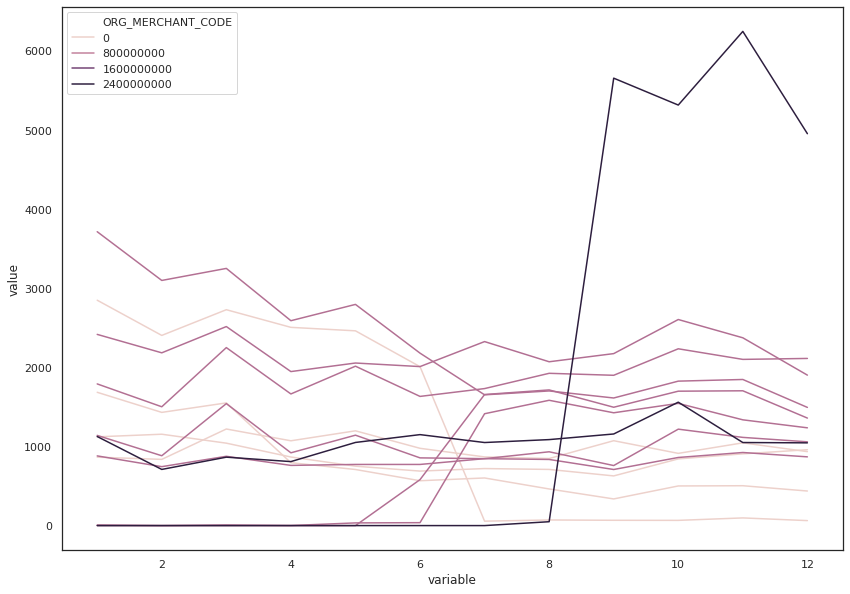

In [144]:
sns.lineplot(x="variable", y="value", hue='ORG_MERCHANT_CODE', data=tmp4)

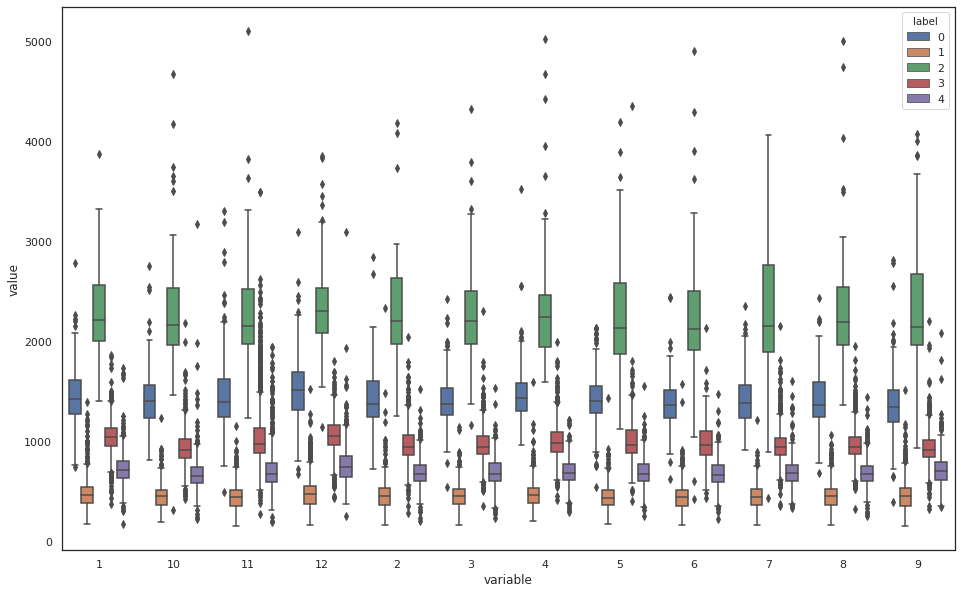

In [138]:
sns.boxplot(x="variable", y="value", hue='label', data=tmp4)

In [128]:
def find_merchant_desc(row):
    m_code = row['ORG_MERCHANT_CODE']
    return subset_df[subset_df.ORG_MERCHANT_CODE == m_code].MERCHANT_BASE.values[0]

In [129]:
# tmp3.head(5)
tmp3['m_desc'] = tmp3.apply(find_merchant_desc, axis=1)

In [140]:
set(tmp3[tmp3.label==1].m_desc.values)

{'AUBONPAIN',
 'BLACKCANYON',
 'BONCHON',
 'BURGERKING',
 'COCO_ICHIBAN',
 'CRG_CHABUTON',
 'CRG_COLDSTONE',
 'CRG_PEPPERLUNCH',
 'CRG_YOSHINOYA',
 'DEANDELUCA',
 'FUJI',
 'HUASENGHONG',
 'JEFFERSTEK',
 'KFC',
 'MCDONALD',
 'MKSUKI',
 'OISHI_DELIVERY',
 'OISHI_RAMEN',
 'PIZZAHUT',
 'SANTAFESTEAK',
 'SEEFAH',
 'SP',
 'STARBUCKS',
 'SWENSENS',
 'TEXASSUKI',
 'THEPIZZA',
 'YAMAGOYA',
 'YAYOI',
 'YUMSAAP'}